# DSA 210 Project - Ahmet Çavuşoğlu

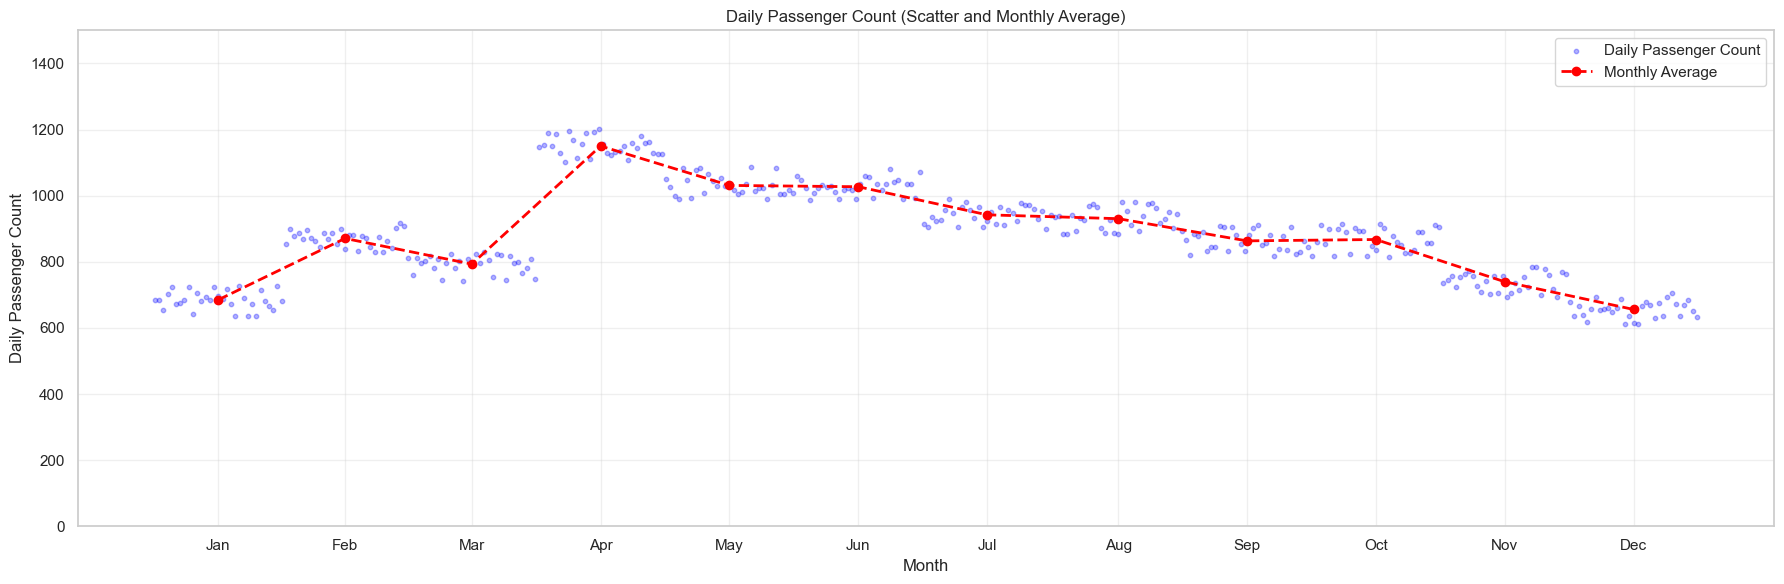

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("yolcu_hava_2024.csv")
df = df[df["istasyon_adi"] == "BESIKTAS"]  # Only Beşiktaş pier

df["tarih"] = pd.to_datetime(df["tarih"])
df["day"] = (df["tarih"] - pd.Timestamp("2024-01-01")).dt.days + 1
df["month"] = df["tarih"].dt.month

# Daily passenger scatter plot
plt.figure(figsize=(18, 6))
plt.scatter(df["day"], df["gunluk_yolcu"], alpha=0.3,
            s=10, color='blue', label="Daily Passenger Count")

# Plot monthly averages
monthly_avg = df.groupby("month")["gunluk_yolcu"].mean()
month_day_center = df.groupby("month")["day"].mean()  # midpoints of months
plt.plot(month_day_center, monthly_avg, color='red', linestyle='--',
         linewidth=2, marker='o', label="Monthly Average")

# Month names in English
month_names = ["Jan", "Feb", "Mar", "Apr", "May",
               "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_ticks = df.groupby("month")["day"].mean()

plt.xticks(month_ticks, month_names)
plt.ylim(0, 1500)
plt.xlabel("Month")
plt.ylabel("Daily Passenger Count")
plt.title("Daily Passenger Count (Scatter and Monthly Average)")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()


# Bar Chart: Monthly Average Passenger Count
Displays monthly averages of daily passenger counts for Beşiktaş Pier.

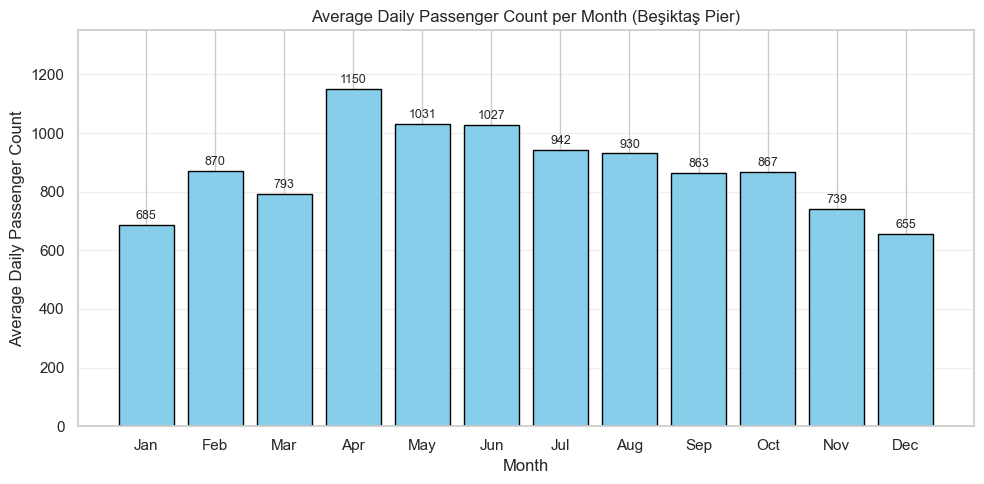

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("yolcu_hava_2024.csv")

# Filter for Beşiktaş pier
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()
besiktas_df["date"] = pd.to_datetime(besiktas_df["tarih"])
besiktas_df["month"] = besiktas_df["date"].dt.month

# Calculate monthly average daily passenger count
monthly_avg = besiktas_df.groupby("month")["gunluk_yolcu"].mean()

# Plot bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue', edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, f"{int(yval)}",
             ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title("Average Daily Passenger Count per Month (Beşiktaş Pier)")
plt.xlabel("Month")
plt.ylabel("Average Daily Passenger Count")

# Month names as x-axis labels
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

# Y-axis limits
plt.ylim(0, max(monthly_avg.values) + 200)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA)


In [9]:
#Printing statistics
besiktas_df["period"] = besiktas_df["donem"].map({"Okul": "School Term", "Tatil": "Holiday"})

column_mapping = {
    "gunluk_yolcu": "Passenger Count",
    "ruzgar_hizi": "Wind Speed (km/h)",
    "nem": "Humidity (%)",
    "maksimum_sicaklik": "Temperature (°C)"
}

besiktas_df_renamed = besiktas_df.rename(columns=column_mapping)

columns_to_analyze = list(column_mapping.values())

for period in ["School Term", "Holiday"]:
    print(f"\n{period} Statistics:\n")
    
    df_period = besiktas_df_renamed[besiktas_df_renamed["period"] == period]
    
    means = df_period[columns_to_analyze].mean()
    stds = df_period[columns_to_analyze].std()
    vars_ = df_period[columns_to_analyze].var()
    
    stats_df = pd.DataFrame({
        "Mean": means,
        "Standard Deviation": stds,
        "Variance": vars_
    }).round(2)

    print(stats_df)



School Term Statistics:

                     Mean  Standard Deviation  Variance
Passenger Count    866.25              156.84  24599.20
Wind Speed (km/h)   19.53                7.66     58.64
Humidity (%)        63.12                7.28     53.05
Temperature (°C)    22.36                7.88     62.16

Holiday Statistics:

                     Mean  Standard Deviation  Variance
Passenger Count    906.90              107.82  11625.68
Wind Speed (km/h)   17.02                5.35     28.67
Humidity (%)        63.43                7.08     50.20
Temperature (°C)    23.60                7.79     60.61


# Pie Chart: Seasonal Passenger Distribution
This pie chart displays total passenger distribution across seasons.

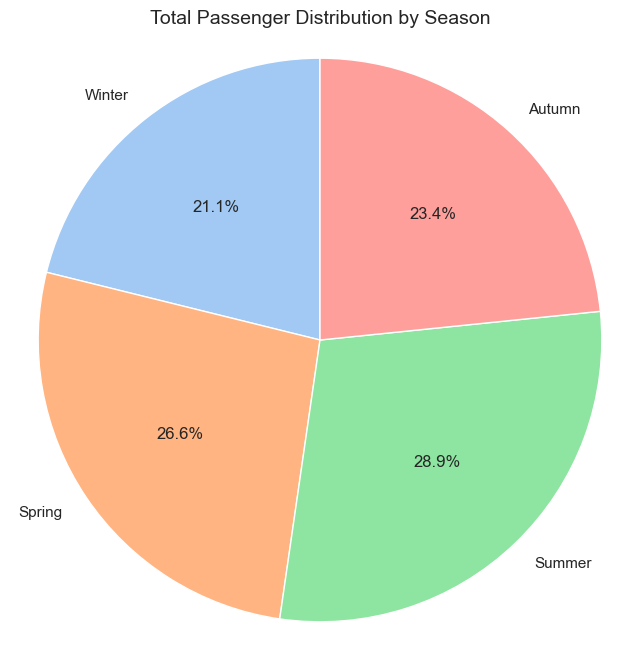

In [10]:
# Season function
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["ay"].apply(get_season)

# Total passenger count by season
season_total = df.groupby("season")["gunluk_yolcu"].sum().reindex([
    "Winter", "Spring", "Summer", "Autumn"])

# Pie Chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")
plt.pie(season_total, labels=season_total.index,
        autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Total Passenger Distribution by Season", fontsize=14)
plt.axis('equal')  # Keeps it a circle
plt.show()


# Visualization: General Plot
This figure presents a plotted analysis related to passenger count and weather features.

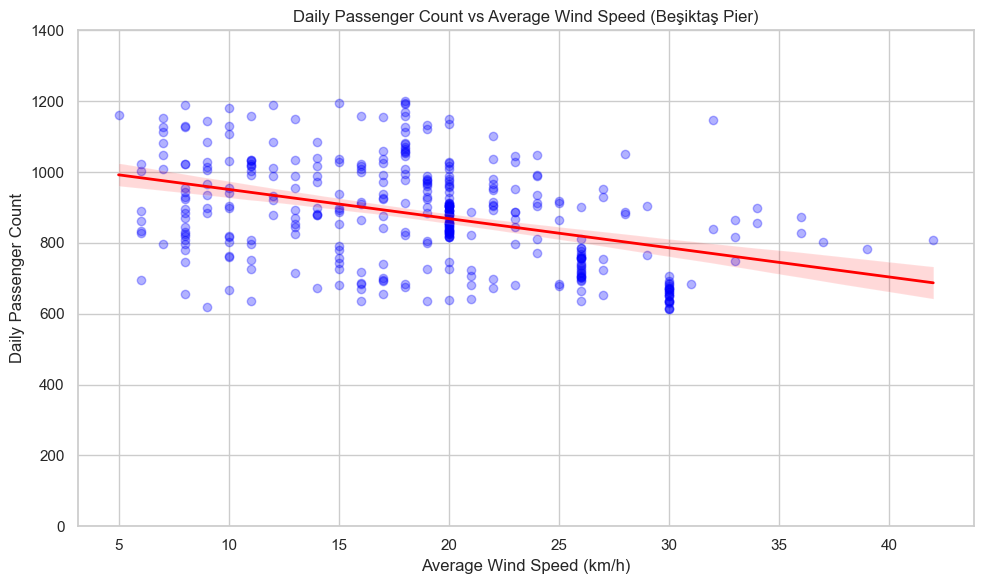

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("yolcu_hava_2024.csv")

# Filter only for Beşiktaş pier
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Drop missing values
df_clean = besiktas_df[["gunluk_yolcu", "ruzgar_hizi"]].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x="ruzgar_hizi",
    y="gunluk_yolcu",
    scatter_kws={"alpha": 0.3, "color": "blue"},
    line_kws={"color": "red", "linewidth": 2}
)

plt.title("Daily Passenger Count vs Average Wind Speed (Beşiktaş Pier)")
plt.xlabel("Average Wind Speed (km/h)")
plt.ylabel("Daily Passenger Count")
plt.grid(True)
plt.ylim(0, 1400)
plt.tight_layout()
plt.show()


# Visualization: General Plot
This figure presents a plotted analysis related to passenger count and weather features.

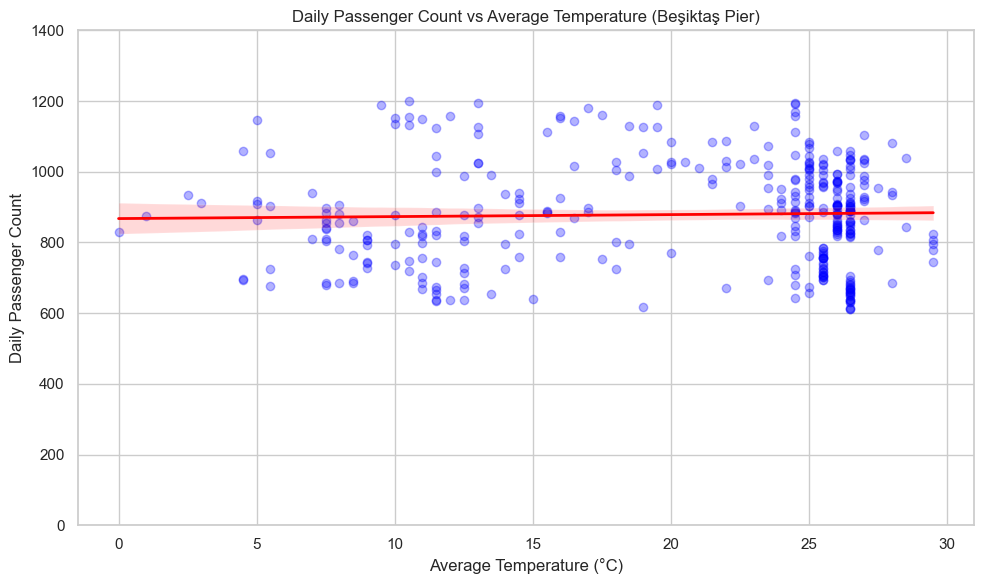

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter dataset
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Calculate average temperature
besiktas_df["average_temperature"] = (besiktas_df["maksimum_sicaklik"] + besiktas_df["minimum_sicaklik"]) / 2

# Drop missing values if any
df_clean = besiktas_df[["average_temperature", "gunluk_yolcu"]].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x="average_temperature",
    y="gunluk_yolcu",
    scatter_kws={"alpha": 0.3, "color": "blue"},
    line_kws={"color": "red", "linewidth": 2}
)

plt.title("Daily Passenger Count vs Average Temperature (Beşiktaş Pier)")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Daily Passenger Count")
plt.ylim(0, 1400)
plt.grid(True)
plt.tight_layout()
plt.show()


# Visualization: General Plot
This figure presents a plotted analysis related to passenger count and weather features.

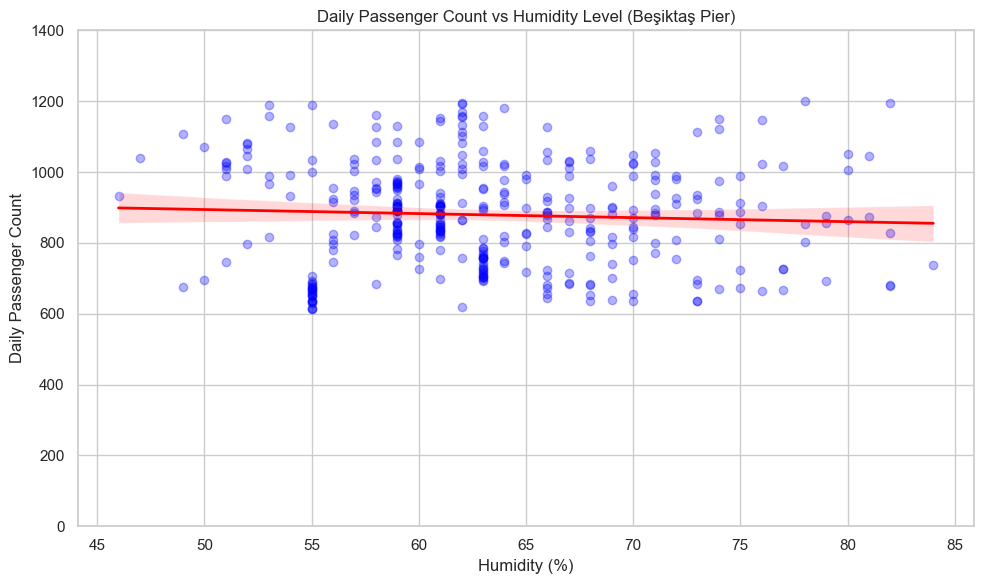

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter Beşiktaş data
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Drop missing values
df_clean = besiktas_df[["nem", "gunluk_yolcu"]].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x="nem",
    y="gunluk_yolcu",
    scatter_kws={"alpha": 0.3, "color": "blue"},
    line_kws={"color": "red", "linewidth": 2}
)

plt.title("Daily Passenger Count vs Humidity Level (Beşiktaş Pier)")
plt.xlabel("Humidity (%)")
plt.ylabel("Daily Passenger Count")
plt.ylim(0, 1400)
plt.grid(True)
plt.tight_layout()
plt.show()


# Boxplot: Distribution by School and Holiday Periods
Compares daily passenger count distributions for different school periods.

/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_59874/736343268.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=besiktas_df, x="period_label", y="gunluk_yolcu", palette="pastel")


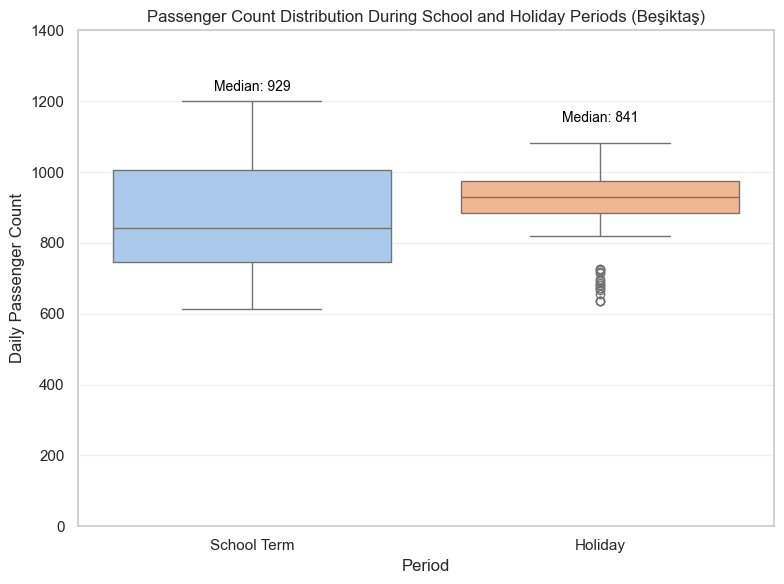

In [14]:
# Encode period numerically and label it in English
besiktas_df["period_numeric"] = besiktas_df["donem"].map({"Okul": 1, "Tatil": 0})
besiktas_df["period_label"] = besiktas_df["period_numeric"].map({0: "Holiday", 1: "School Term"})

# Boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=besiktas_df, x="period_label", y="gunluk_yolcu", palette="pastel")

# Add median text
grouped_median = besiktas_df.groupby("period_label")["gunluk_yolcu"].median()
for i, median_val in enumerate(grouped_median):
    ax.text(i, median_val + 300, f"Median: {int(median_val)}",
            horizontalalignment='center', color='black', fontsize=10)

# Labels and formatting
plt.title("Passenger Count Distribution During School and Holiday Periods (Beşiktaş)")
plt.xlabel("Period")
plt.ylabel("Daily Passenger Count")
plt.ylim(0, 1400)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [16]:
from scipy.stats import ttest_ind
import pandas as pd

# Load the dataset and filter for Beşiktaş pier
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Map 'donem' column to numeric: Holiday = 0, School = 1
besiktas_df["donem_numeric"] = besiktas_df["donem"].map({"Tatil": 0, "Okul": 1})

# Separate passenger counts
holiday_passengers = besiktas_df[besiktas_df["donem_numeric"] == 0]["gunluk_yolcu"]
school_passengers = besiktas_df[besiktas_df["donem_numeric"] == 1]["gunluk_yolcu"]

# Perform independent two-sample t-test
t_stat, p_val = ttest_ind(holiday_passengers, school_passengers, equal_var=False)

# One-tailed p-value (testing if holiday > school)
p_one_tailed = p_val / 2 if t_stat > 0 else 1 - (p_val / 2)

# Decision based on alpha = 0.05
alpha = 0.05
if p_one_tailed < alpha:
    print(f"H0 is rejected. p-value = {p_one_tailed:.4f}")
    print("Conclusion: The average number of daily passengers is significantly higher during holidays.")
else:
    print(f"H0 is not rejected. p-value = {p_one_tailed:.4f}")
    print("Conclusion: There is no statistically significant difference between holidays and school terms.")


H0 is rejected. p-value = 0.0021
Conclusion: The average number of daily passengers is significantly higher during holidays.


In [17]:
from scipy.stats import pearsonr
import pandas as pd

# Load dataset
df = pd.read_csv("yolcu_hava_2024.csv")

# Filter for Beşiktaş pier
df_besiktas = df[df["istasyon_adi"] == "BESIKTAS"]

# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df_besiktas["ruzgar_hizi"], df_besiktas["gunluk_yolcu"])

# Print results
print(f"Pearson Correlation Coefficient: {corr:.3f}")
print(f"p-value: {p_value:.6f}")


Pearson Correlation Coefficient: -0.406
p-value: 0.000000


In [18]:
from scipy.stats import pearsonr
import pandas as pd

# Load and filter Beşiktaş-only data
df = pd.read_csv("yolcu_hava_2024.csv")
df_besiktas = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Calculate average temperature
df_besiktas["average_temperature"] = (df_besiktas["maksimum_sicaklik"] + df_besiktas["minimum_sicaklik"]) / 2

# Pearson correlation: Humidity vs Passenger Count
corr_humidity, p_val_humidity = pearsonr(df_besiktas["nem"], df_besiktas["gunluk_yolcu"])
print(f"Humidity vs Daily Passenger Count → Correlation: {corr_humidity:.3f}, p-value: {p_val_humidity:.4f}")

# Pearson correlation: Average Temperature vs Passenger Count
corr_temp, p_val_temp = pearsonr(df_besiktas["average_temperature"], df_besiktas["gunluk_yolcu"])
print(f"Average Temperature vs Daily Passenger Count → Correlation: {corr_temp:.3f}, p-value: {p_val_temp:.4f}")

# Encode 'donem' column: 0 = Holiday, 1 = School Term
df_besiktas["school_term_numeric"] = df_besiktas["donem"].apply(lambda x: 0 if x == "Tatil" else 1)

# Pearson correlation: School Term vs Passenger Count
corr_school, p_val_school = pearsonr(df_besiktas["school_term_numeric"], df_besiktas["gunluk_yolcu"])
print(f"School Term vs Daily Passenger Count → Correlation: {corr_school:.3f}, p-value: {p_val_school:.4f}")


Humidity vs Daily Passenger Count → Correlation: -0.057, p-value: 0.2758
Average Temperature vs Daily Passenger Count → Correlation: 0.029, p-value: 0.5850
School Term vs Daily Passenger Count → Correlation: -0.131, p-value: 0.0122


# Correlation Heatmap: Weather and Passenger Numbers
Illustrates correlations between weather variables and passenger count.

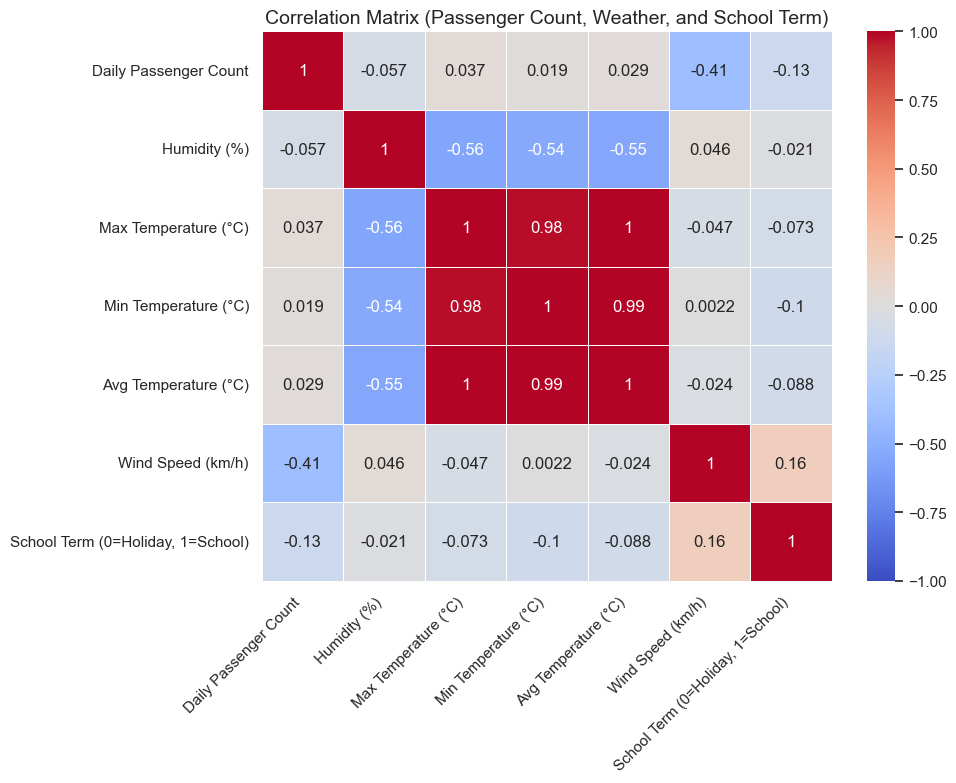

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter Beşiktaş data
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Convert date
besiktas_df["date"] = pd.to_datetime(besiktas_df["tarih"])

# New columns
besiktas_df["school_term_numeric"] = besiktas_df["donem"].map({"Tatil": 0, "Okul": 1})
besiktas_df["avg_temperature"] = (
    besiktas_df["maksimum_sicaklik"] + besiktas_df["minimum_sicaklik"]
) / 2

# Build English-named DataFrame
heatmap_df = besiktas_df.rename(columns={
    "gunluk_yolcu": "Daily Passenger Count",
    "nem": "Humidity (%)",
    "maksimum_sicaklik": "Max Temperature (°C)",
    "minimum_sicaklik": "Min Temperature (°C)",
    "ruzgar_hizi": "Wind Speed (km/h)",
    "avg_temperature": "Avg Temperature (°C)",
    "school_term_numeric": "School Term (0=Holiday, 1=School)"
})[
    [
        "Daily Passenger Count",
        "Humidity (%)",
        "Max Temperature (°C)",
        "Min Temperature (°C)",
        "Avg Temperature (°C)",
        "Wind Speed (km/h)",
        "School Term (0=Holiday, 1=School)"
    ]
]

# Correlation matrix
corr_matrix = heatmap_df.corr()

# Heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (Passenger Count, Weather, and School Term)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Grouped Bar Plot: Wind Condition and Passenger Count
Visualizes the impact of wind conditions throughout the week.

/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_1573/4242932059.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


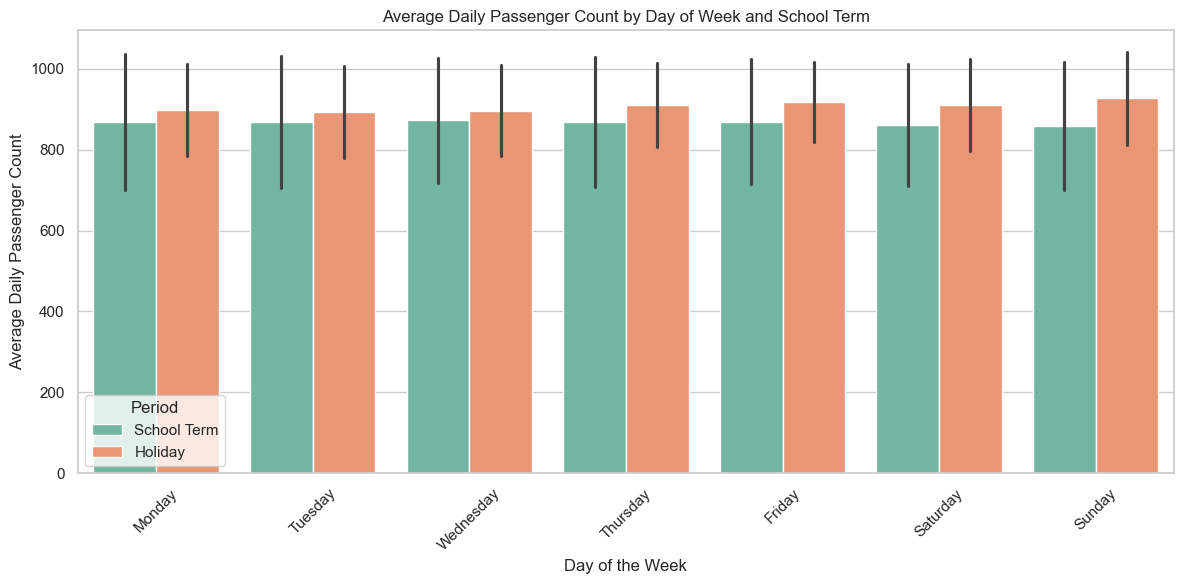

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter Beşiktaş data
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Prepare necessary columns
besiktas_df["date"] = pd.to_datetime(besiktas_df["tarih"])
besiktas_df["day_of_week"] = besiktas_df["date"].dt.day_name()
besiktas_df["period"] = besiktas_df["donem"].map({"Tatil": "Holiday", "Okul": "School Term"})
besiktas_df["daily_passenger_count"] = besiktas_df["gunluk_yolcu"]

# Multivariate bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=besiktas_df,
    x="day_of_week",
    y="daily_passenger_count",
    hue="period",
    ci="sd",
    palette="Set2"
)

plt.title("Average Daily Passenger Count by Day of Week and School Term")
plt.xlabel("Day of the Week")
plt.ylabel("Average Daily Passenger Count")
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.tight_layout()
plt.show()


# Grouped Bar Plot: Wind Condition and Passenger Count
Visualizes the impact of wind conditions throughout the week.

/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_1573/859352611.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


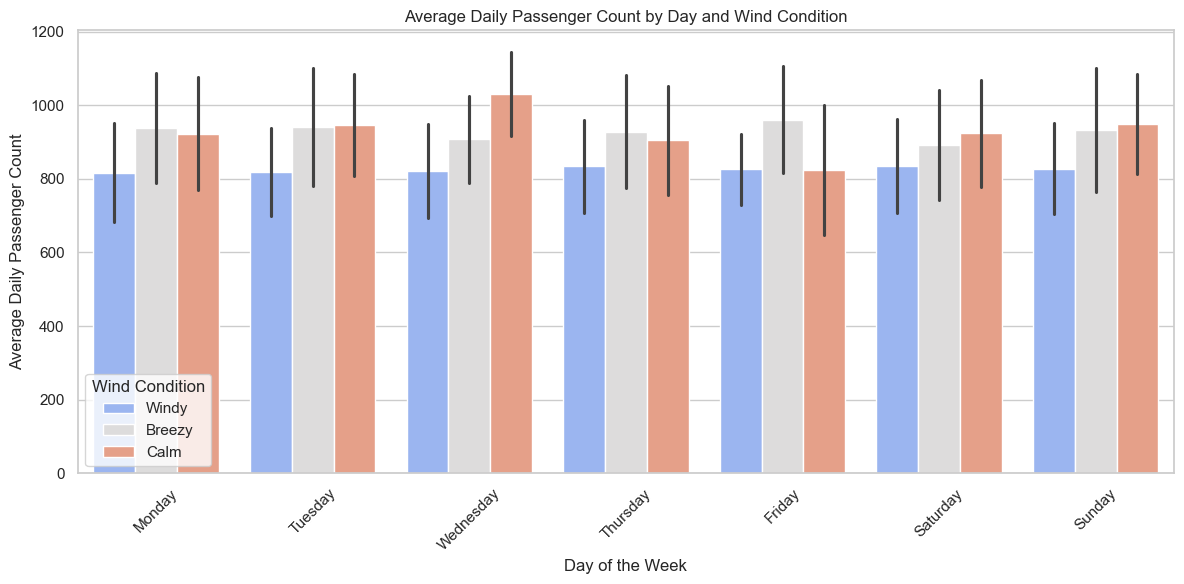

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter Beşiktaş-only data
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Convert wind speed to category labels
def wind_category(speed):
    if speed < 10:
        return "Calm"
    elif speed < 20:
        return "Breezy"
    else:
        return "Windy"

besiktas_df["wind_condition"] = besiktas_df["ruzgar_hizi"].apply(wind_category)

# Convert date and extract day name
besiktas_df["date"] = pd.to_datetime(besiktas_df["tarih"])
besiktas_df["day_of_week"] = besiktas_df["date"].dt.day_name()

# Rename for plotting
besiktas_df["daily_passenger_count"] = besiktas_df["gunluk_yolcu"]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=besiktas_df,
    x="day_of_week",
    y="daily_passenger_count",
    hue="wind_condition",
    ci="sd",
    palette="coolwarm"
)

plt.title("Average Daily Passenger Count by Day and Wind Condition")
plt.xlabel("Day of the Week")
plt.ylabel("Average Daily Passenger Count")
plt.xticks(rotation=45)
plt.legend(title="Wind Condition")
plt.tight_layout()
plt.show()


# MACHINE LEARNING - REGRESSION

# SCHOOL-TERM ONLY

The School Term feature is a simple binary variable (0 or 1), which limits the model's ability to learn complex patterns. As a result, the model produces less accurate predictions and tends to output similar values regardless of input variation.


Feature: School Term
----------------------------------------
Linear Regression Results:
  MSE : 978593.35
  RMSE: 989.24
  R^2 : 0.046



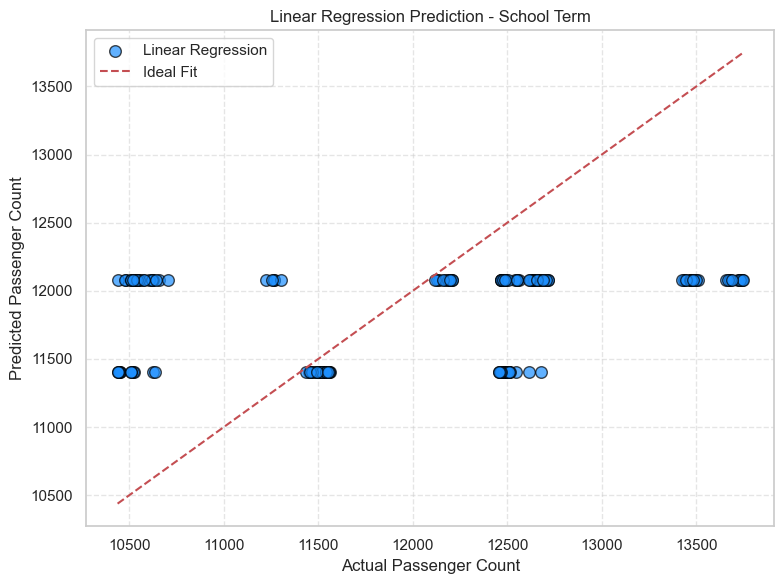

Decision Tree Results:
  MSE : 978593.35
  RMSE: 989.24
  R^2 : 0.046



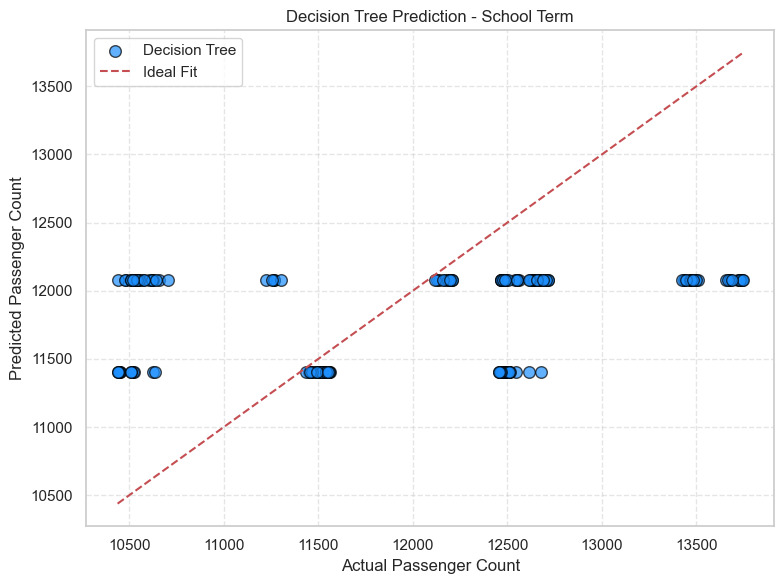

Random Forest Results:
  MSE : 977815.25
  RMSE: 988.85
  R^2 : 0.047



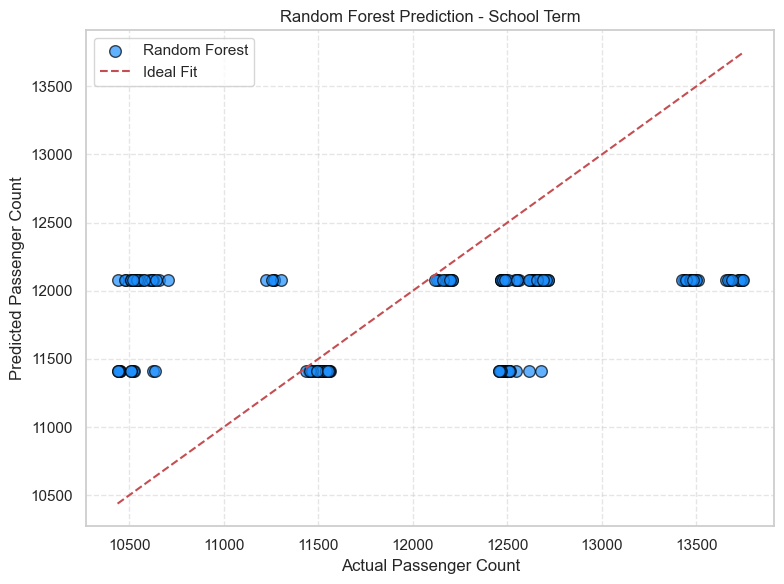

In [23]:
# School Term Feature
X = besiktas_df[["donem_okul"]]
y = besiktas_df["gunluk_yolcu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFeature: School Term\n" + "-"*40)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Results:")
    print(f"  MSE : {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R^2 : {r2:.3f}\n")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='black', alpha=0.7, s=70, label=model_name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
    plt.xlabel("Actual Passenger Count")
    plt.ylabel("Predicted Passenger Count")
    plt.title(f"{model_name} Prediction - School Term")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


# HUMIDITY ONLY


Feature: Humidity
----------------------------------------
Linear Regression Results:
  MSE : 1050282.83
  RMSE: 1024.83
  R^2 : -0.023



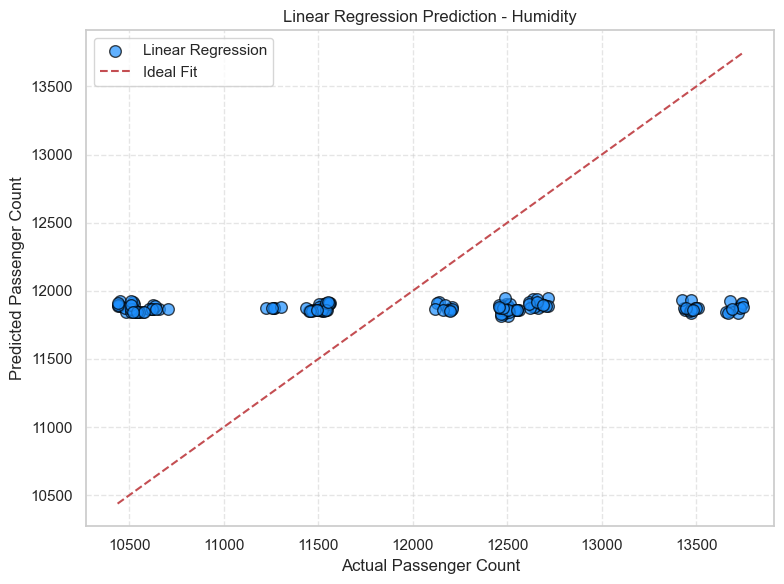

Decision Tree Results:
  MSE : 762481.75
  RMSE: 873.20
  R^2 : 0.257



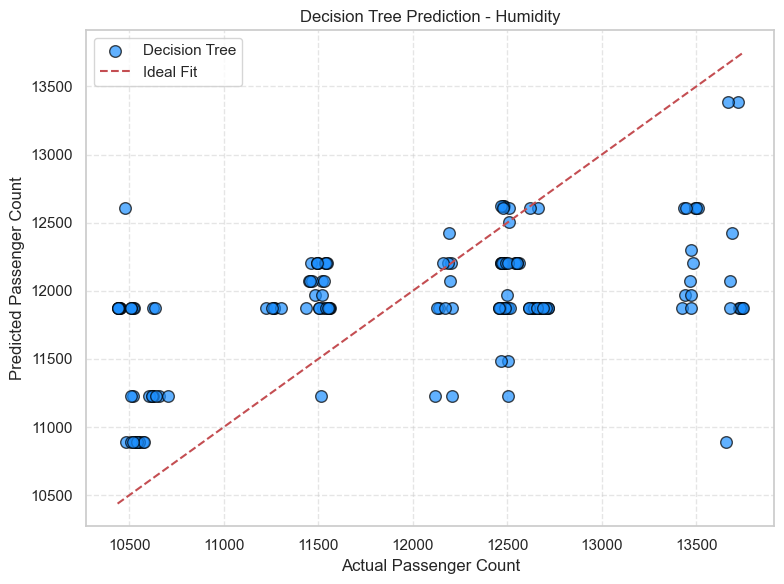

Random Forest Results:
  MSE : 748624.21
  RMSE: 865.23
  R^2 : 0.271



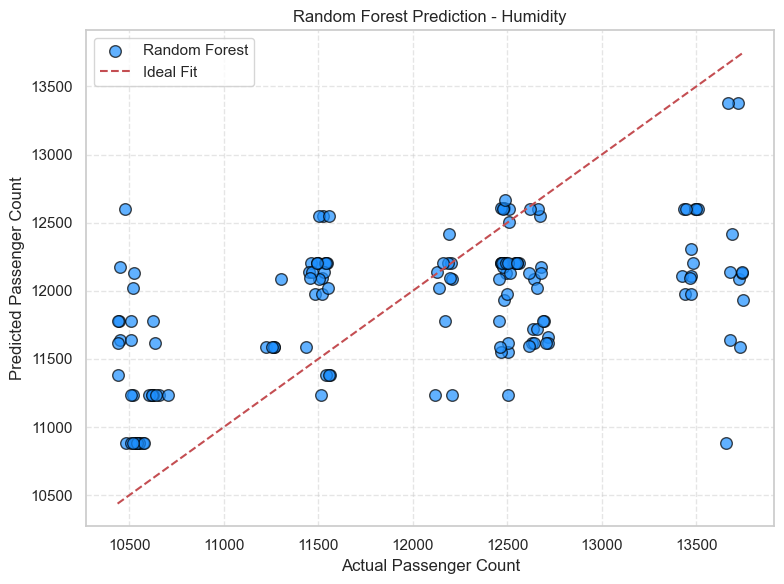

In [24]:
# Humidity Feature
X = besiktas_df[["nem"]]
y = besiktas_df["gunluk_yolcu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFeature: Humidity\n" + "-"*40)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Results:")
    print(f"  MSE : {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R^2 : {r2:.3f}\n")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='black', alpha=0.7, s=70, label=model_name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
    plt.xlabel("Actual Passenger Count")
    plt.ylabel("Predicted Passenger Count")
    plt.title(f"{model_name} Prediction - Humidity")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


# WIND-SPEED ONLY


Feature: Wind Speed
----------------------------------------
Linear Regression Results:
  MSE : 971287.00
  RMSE: 985.54
  R^2 : 0.054



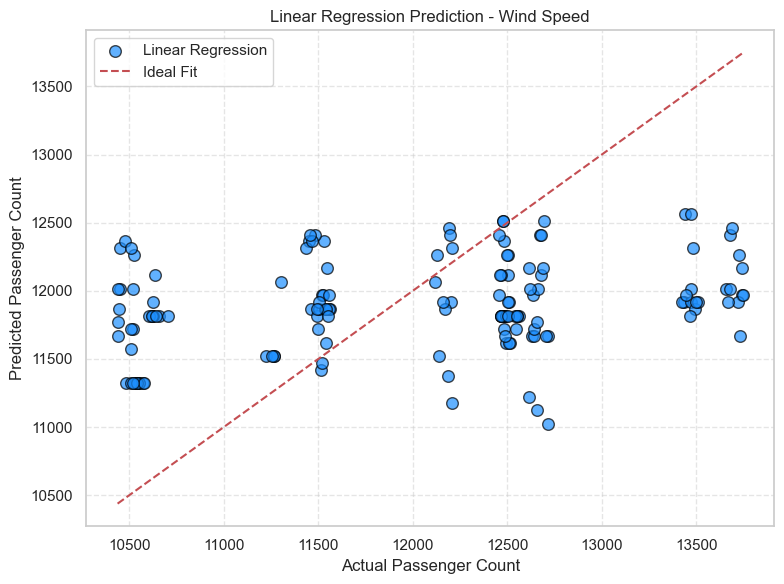

Decision Tree Results:
  MSE : 834585.02
  RMSE: 913.56
  R^2 : 0.187



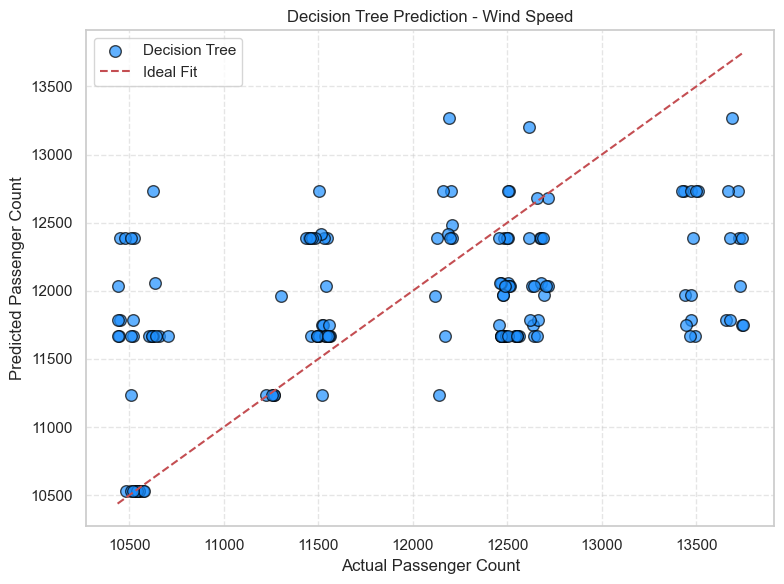

Random Forest Results:
  MSE : 892269.89
  RMSE: 944.60
  R^2 : 0.131



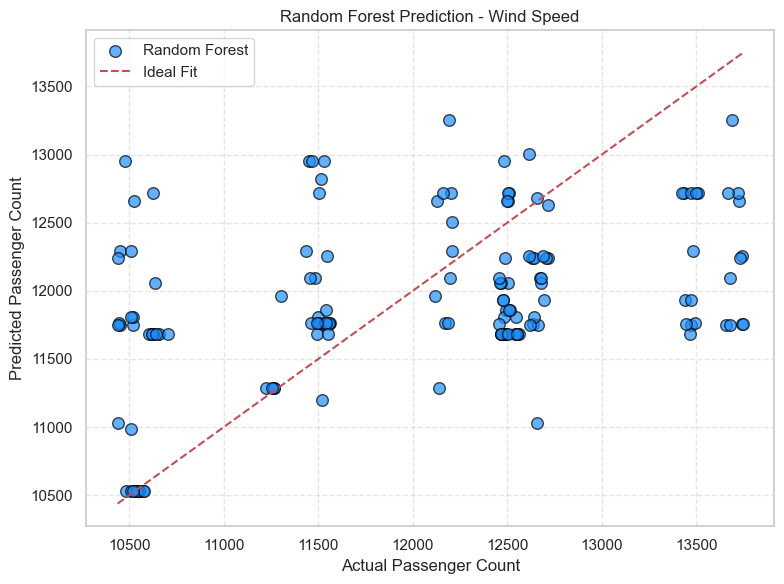

In [25]:
# Wind Speed Feature
X = besiktas_df[["ruzgar_hizi"]]
y = besiktas_df["gunluk_yolcu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFeature: Wind Speed\n" + "-"*40)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Results:")
    print(f"  MSE : {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R^2 : {r2:.3f}\n")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='black', alpha=0.7, s=70, label=model_name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
    plt.xlabel("Actual Passenger Count")
    plt.ylabel("Predicted Passenger Count")
    plt.title(f"{model_name} Prediction - Wind Speed")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


# TEMPERATURE ONLY


Feature: Temperature
----------------------------------------
Linear Regression Results:
  MSE : 1075267.45
  RMSE: 1036.95
  R^2 : -0.048



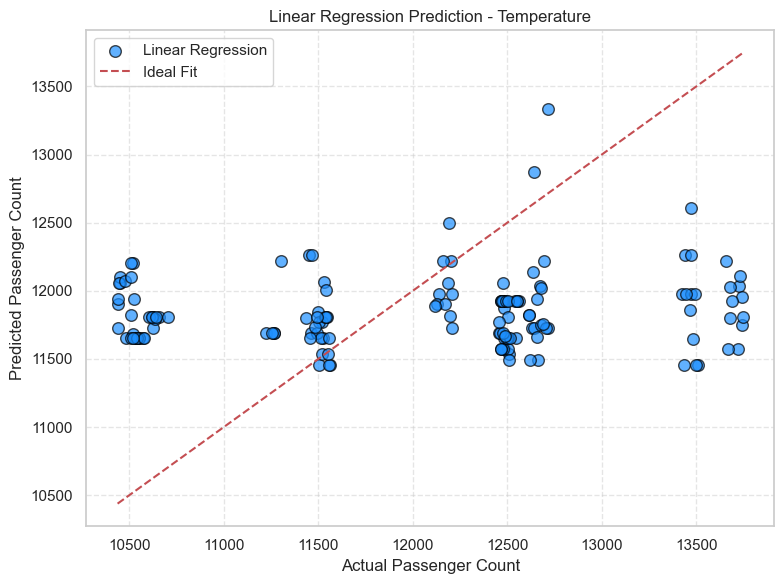

Decision Tree Results:
  MSE : 906400.67
  RMSE: 952.05
  R^2 : 0.117



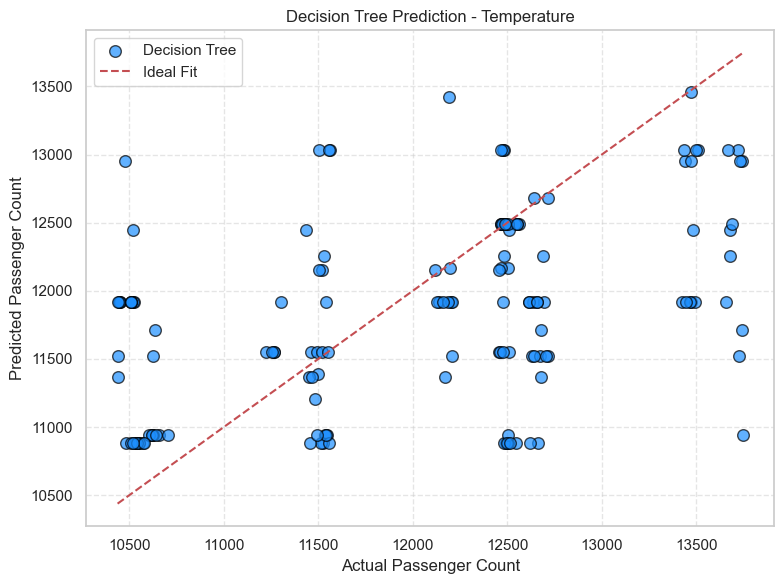

Random Forest Results:
  MSE : 724372.06
  RMSE: 851.10
  R^2 : 0.294



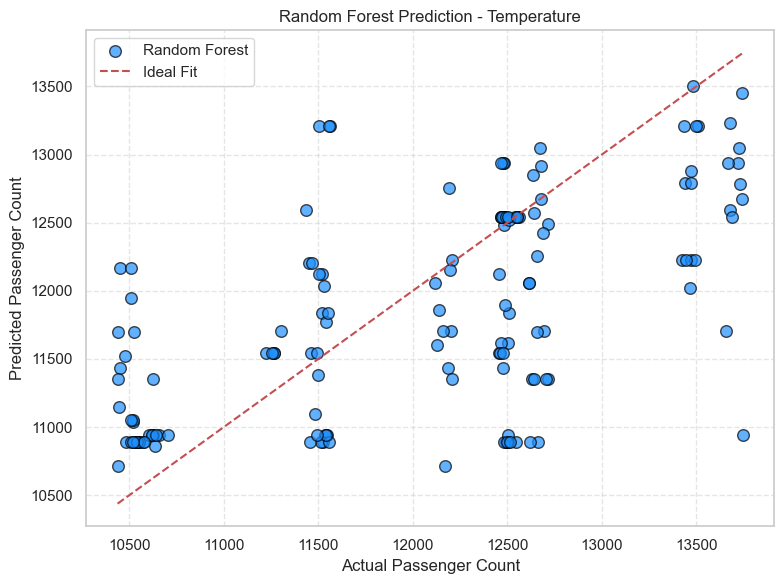

In [26]:
# Temperature Feature (Max & Min)
X = besiktas_df[["maksimum_sicaklik", "minimum_sicaklik"]]
y = besiktas_df["gunluk_yolcu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFeature: Temperature\n" + "-"*40)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Results:")
    print(f"  MSE : {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R^2 : {r2:.3f}\n")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='black', alpha=0.7, s=70, label=model_name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
    plt.xlabel("Actual Passenger Count")
    plt.ylabel("Predicted Passenger Count")
    plt.title(f"{model_name} Prediction - Temperature")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


# JUST ALL WEATHER CONDITIONS

🌦️ Random Forest — Just Weather Conditions
  - MSE : 289226.86
  - RMSE: 537.80
  - MAE : 328.59
  - R²  : 0.718


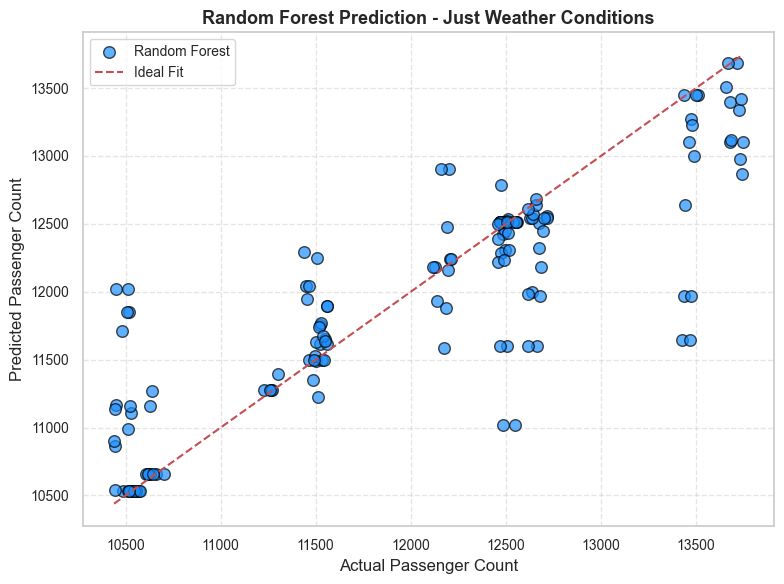

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Define input features: school period + weather conditions
features = ["donem_okul", "nem", "ruzgar_hizi", "maksimum_sicaklik", "minimum_sicaklik"]

# Create a binary column indicating whether the day is in a school period (1) or holiday (0)
besiktas_df["donem_okul"] = (besiktas_df["donem"] == "Okul").astype(int)

# Prepare input and target variables
X = besiktas_df[features]
y = besiktas_df["gunluk_yolcu"]

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔍 Random Forest Regressor with All Weather Features")
print(f"  - MSE : {mse:.2f}")
print(f"  - RMSE: {rmse:.2f}")
print(f"  - MAE : {mae:.2f}")
print(f"  - R²  : {r2:.3f}")

# Create scatter plot comparing actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='black', alpha=0.7, s=70, label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Passenger Count", fontsize=12)
plt.ylabel("Predicted Passenger Count", fontsize=12)
plt.title("Random Forest Prediction - All Weather Features", fontsize=13, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()


# ALL FEATURES

🔍 Random Forest Regressor with All Features
  - MSE : 151080.97
  - RMSE: 388.69
  - MAE : 230.05
  - R²  : 0.853


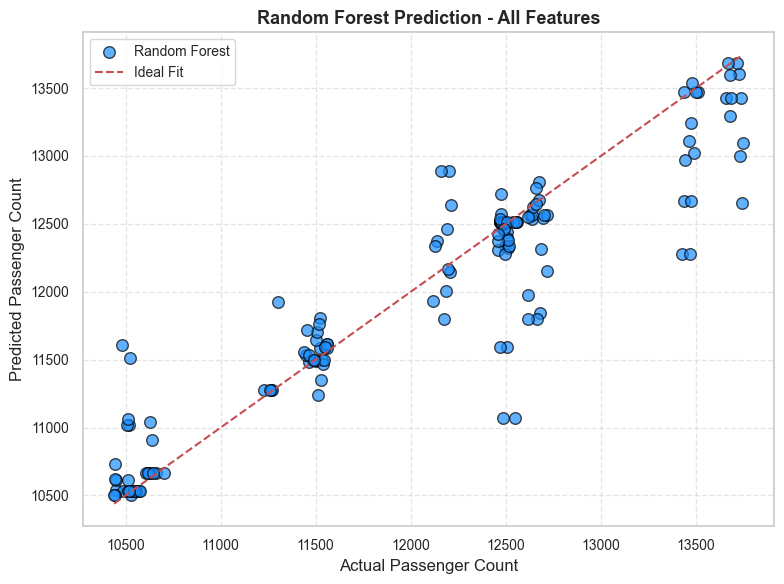

In [43]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load your dataset (change the file path if needed)
df = pd.read_csv("yolcu_hava_2024.csv")

#Filter for Beşiktaş station (case-insensitive)
besiktas_df = df[df["istasyon_adi"].str.lower().str.strip() == "beşiktaş"].copy()

#Create binary feature for school term
besiktas_df["donem_okul"] = (besiktas_df["donem"] == "Okul").astype(int)

#Drop missing values & sort by date
besiktas_df = besiktas_df.dropna().sort_values("tarih")

#Define features and target
features = ["donem_okul", "nem", "ruzgar_hizi", "maksimum_sicaklik", "minimum_sicaklik"]
X = besiktas_df[features]
y = besiktas_df["gunluk_yolcu"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train the model
model = RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Print results
print("🔍 Random Forest Regressor with All Features")
print(f"  - MSE : {mse:.2f}")
print(f"  - RMSE: {rmse:.2f}")
print(f"  - MAE : {mae:.2f}")
print(f"  - R²  : {r2:.3f}")

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='black', alpha=0.7, s=70, label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Passenger Count", fontsize=12)
plt.ylabel("Predicted Passenger Count", fontsize=12)
plt.title("Random Forest Prediction - All Features", fontsize=13, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()


# BAR CHART FOR SCHOOL VS HOLIDAY

<Figure size 700x500 with 0 Axes>

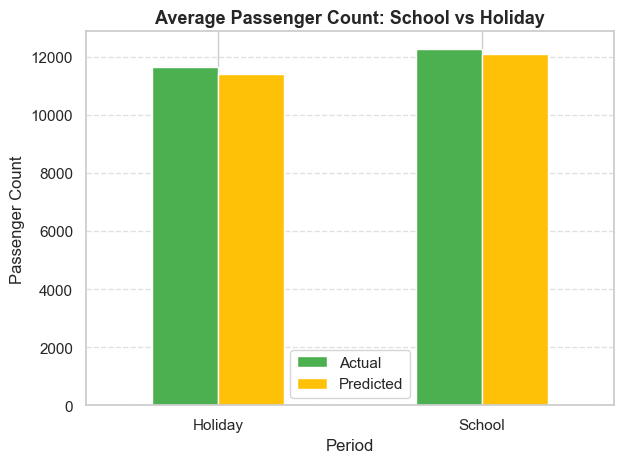

In [27]:
# Bar chart for School vs Holiday
from sklearn.ensemble import RandomForestRegressor

X = besiktas_df[["donem_okul"]]
y = besiktas_df["gunluk_yolcu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

df_results = X_test.copy()
df_results["Actual"] = y_test.values
df_results["Predicted"] = y_pred
df_results["Term"] = df_results["donem_okul"].map({0: "Holiday", 1: "School"})

# Mean
summary = df_results.groupby("Term")[["Actual", "Predicted"]].mean().round(2)

# Bar chart
plt.figure(figsize=(7, 5))
summary.plot(kind="bar", color=["#4CAF50", "#FFC107"])
plt.title("Average Passenger Count: School vs Holiday", fontsize=13, fontweight="bold")
plt.ylabel("Passenger Count")
plt.xlabel("Period")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(["Actual", "Predicted"])
plt.tight_layout()
plt.show()


# CONLUSION MEASUREMENTS

             Feature Group        MSE    RMSE     MAE     R²
0                 Humidity  755389.19  869.13  700.89  0.264
1               Wind Speed  892279.63  944.61  759.63  0.131
2              Temperature  725201.28  851.59  660.29  0.293
3              School Term  977815.25  988.85  818.97  0.047
4  Just Weather Conditions  289226.86  537.80  328.59  0.718
5             All Features  151080.97  388.69  230.05  0.853


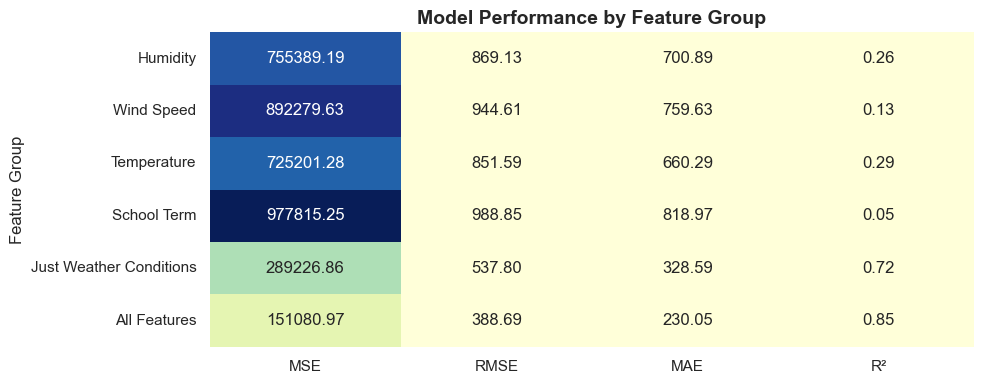

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"].str.lower().str.strip() == "beşiktaş"].copy()
besiktas_df["donem_okul"] = (besiktas_df["donem"] == "Okul").astype(int)
besiktas_df = besiktas_df.dropna().sort_values("tarih")

# Define target
y = besiktas_df["gunluk_yolcu"]

# Define fixed train/test split ONCE for all models (same indices)
X_dummy = besiktas_df[["donem_okul", "nem", "ruzgar_hizi", "maksimum_sicaklik", "minimum_sicaklik"]]
X_train_full, X_test_full, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=42)

# Feature sets
feature_sets = {
    "Humidity": ["nem"],
    "Wind Speed": ["ruzgar_hizi"],
    "Temperature": ["maksimum_sicaklik", "minimum_sicaklik"],
    "School Term": ["donem_okul"],
    "Just Weather Conditions": ["nem", "ruzgar_hizi", "maksimum_sicaklik", "minimum_sicaklik"],
    "All Features": ["donem_okul", "nem", "ruzgar_hizi", "maksimum_sicaklik", "minimum_sicaklik"]
}

# Prepare results
rows = []

# Loop and evaluate
for label, features in feature_sets.items():
    X_train = X_train_full[features]
    X_test = X_test_full[features]

    model = RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    rows.append({
        "Feature Group": label,
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2),
        "R²": round(r2, 3)
    })

# Create DataFrame
results_df = pd.DataFrame(rows)

# Display cleanly
print(results_df)


plt.figure(figsize=(10, 4))
sns.heatmap(results_df.set_index("Feature Group"), annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title("Model Performance by Feature Group", fontsize=14, fontweight="bold")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Yolcu sayılarını 3 sınıfa ayır: düşük, orta, yüksek
y_class = pd.cut(y, bins=3, labels=[0, 1, 2])

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train_c, y_train_c)
y_pred_log = model_log.predict(X_test_c)

print("Logistic Regression Accuracy:", accuracy_score(y_test_c, y_pred_log))


Logistic Regression Accuracy: 0.3741496598639456


In [59]:
from scipy.stats import pearsonr
import pandas as pd

df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Calculate Pearson correlation
pearson_coef, p_val = pearsonr(besiktas_df["ruzgar_hizi"], besiktas_df["gunluk_yolcu"])
print("Pearson Correlation Coefficient:", pearson_coef)
print("p-value:", p_val)


Pearson Correlation Coefficient: -0.40563644983610064
p-value: 6.273449728041423e-16
